In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Corner detecction
where the to edges intersect

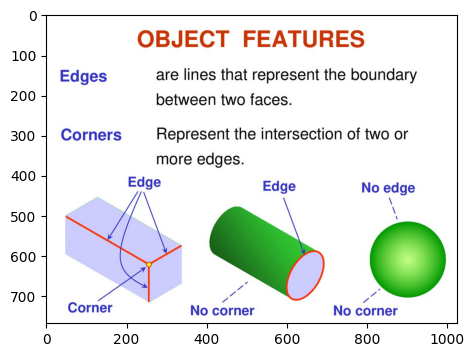

In [4]:
img = cv.imread('edgeCorner.jpeg')
plt.figure(figsize=(8, 4))
plt.imshow(img[:, :, ::-1])
plt.show()

## SSD : sum of square differences
np.sum(np.square(x - y))

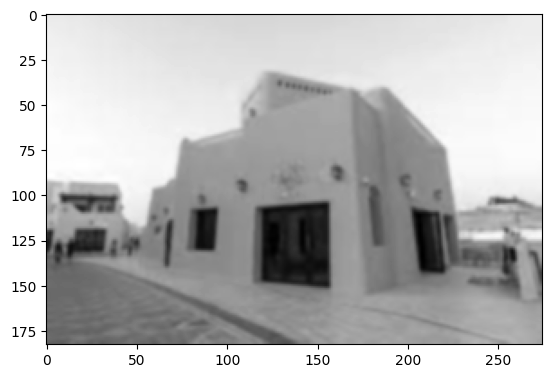

In [5]:
img_org = cv.imread('old_image.jpeg')
img = cv.cvtColor(img_org, cv.COLOR_RGB2GRAY)
# when we smooth the image the algorithm will find beter result
g = cv.getGaussianKernel(5, 1)
g = g @ g.T
img_s = cv.filter2D(img, -1, g)
plt.imshow(img_s, cmap='gray')
plt.show()

# Moravec Algorithm
build a patch around each pixel and compare this patch with the neighbouringpatches, if it is dissimilar from all the  patches, then the pixel is a corner

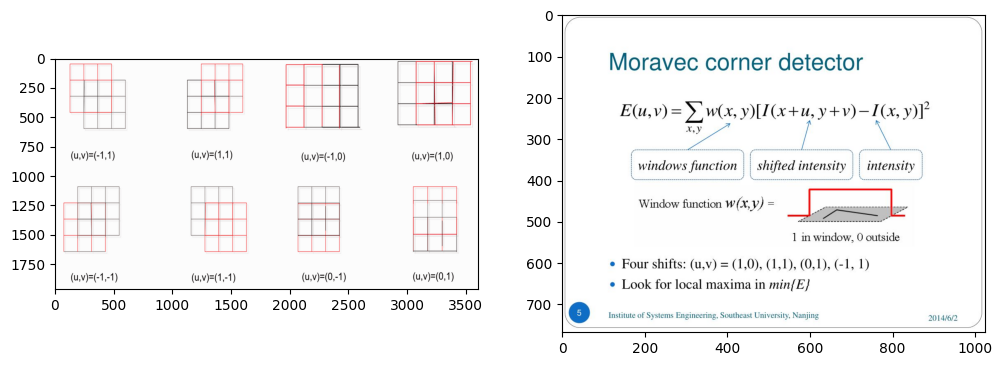

In [6]:
moravec1 = cv.imread('moravecPatch.jpeg')
moravec2 = cv.imread('moravecCalculation.jpeg')
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(moravec1[:, :, ::-1])
plt.subplot(122)
plt.imshow(moravec2[ :, :, ::-1])
plt.show()

In [10]:
numRow, numCol = img.shape[0], img.shape[1]
direction = {
    'left' : (0, -1),
    'right' : (0, 1),
    'up' : (-1, 0),
    'down' : (1, 0),
    'up_right' : (-1, 1),
    'up_left' : (-1, -1),
    'down_right' : (1, 1),
    'down_left' : (1, -1)
}

In [11]:
new = np.zeros(img_s.shape)
for i in range(2, numRow-2):
    for j in range(2, numCol-2):
        minSSD = -1
        for d in direction.values():
            u, v = d[0], d[1]
            p1 = img_s[i-1:i+2, j-1:j+2]
            p2 = img_s[i+u-1:i+u+2, j+v-1:j+v+2]
            ssd = np.sum(np.square(p1 - p2))
            if minSSD == -1:
                minSSD = ssd
            elif ssd < minSSD:
                minSSD = ssd
        
        new[i, j] = minSSD

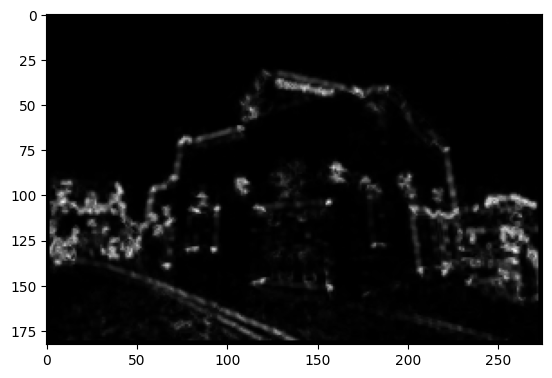

In [12]:
plt.imshow(new, cmap='gray')
plt.show()

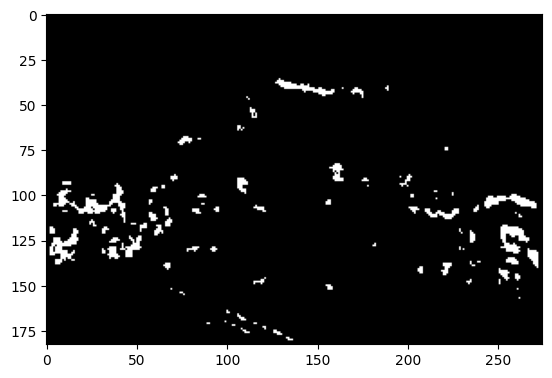

In [13]:
th = new.mean() + 3 * new.std()
new_corner = new > th
plt.imshow(new_corner, cmap='gray')
plt.show()

In [14]:
img2 = img_org
idx = np.argwhere(new_corner)
r, c = idx[:, 0], idx[:, 1]
for i in range(len(r)):
    img2 = cv.circle(np.float64(img2), (c[i], r[i]), 0, (0, 0, 255), -1)

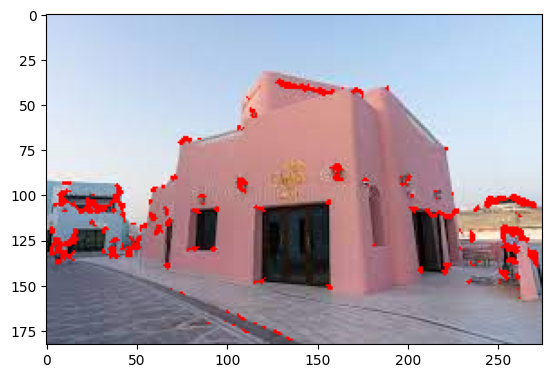

In [15]:
plt.imshow(np.array(img2[:, :, ::-1], dtype=np.uint16))

# Harris corner detection

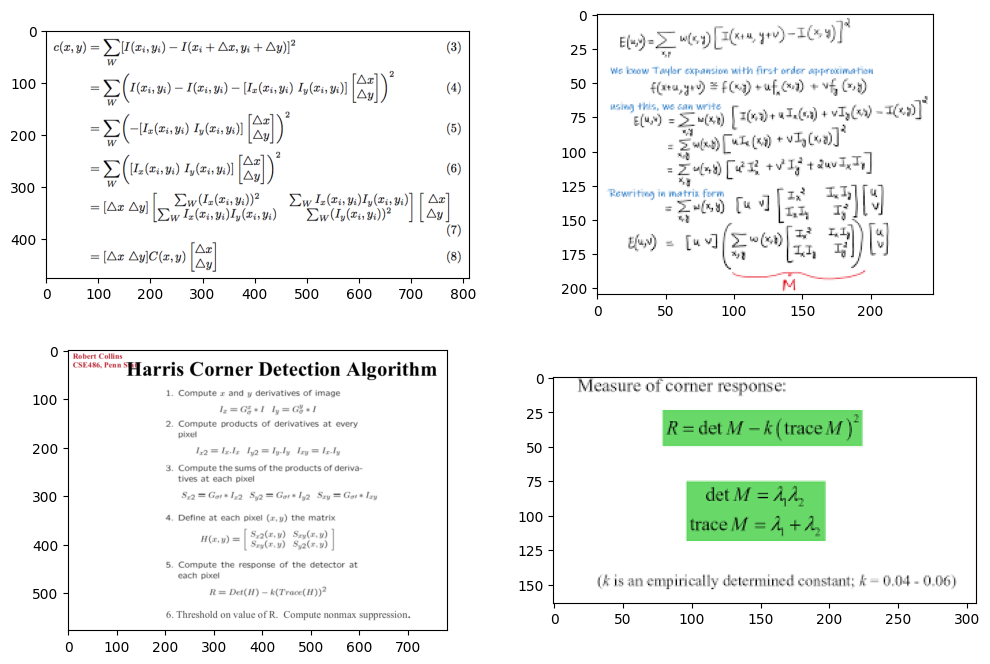

In [16]:
hariss1 = cv.imread('harissCornerFormula.png')
hariss2 = cv.imread('harissCornerFormula2.png')
harissMatrix1 = cv.imread('harrisStrictureMatrix.png')
harissMatrix2 = cv.imread('harrisStructureMatrix2.png')
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(hariss1[:, :, ::-1])
plt.subplot(222)
plt.imshow(hariss2[:, :, ::-1])
plt.subplot(223)
plt.imshow(harissMatrix1[:, :, ::-1])
plt.subplot(224)
plt.imshow(harissMatrix2[:, :, ::-1])
plt.show()

In [17]:
from scipy import signal

In [18]:
img = img.astype(np.float64)
g = cv.getGaussianKernel(7, 2)
g = g @ g.T
img_s = cv.filter2D(img, -1, g)
mask_x = np.array([[-1],
                   [1]])
mask_y = mask_x.T
Ix = cv.filter2D(img_s, -1, mask_x)
Iy = cv.filter2D(img_s, -1, mask_y)

Ix2 = Ix * Ix
Iy2 = Iy * Iy
IxIy = Ix * Iy

In [19]:
k = np.ones((3, 3))
Ix2_cov = cv.filter2D(Ix2, -1, k)
Iy2_cov = cv.filter2D(Iy2, -1, k)
IxIy_cov = cv.filter2D(IxIy, -1, k)

In [20]:
# large eigen value L1, and small eigen value L2
L1 = ((Ix2_cov + Iy2_cov) + np.sqrt(np.square(Ix2_cov + Iy2_cov) - 4 * np.square(IxIy_cov))) / 2
L2 = ((Ix2_cov + Iy2_cov) - np.sqrt(np.square(Ix2_cov + Iy2_cov) - 4 * np.square(IxIy_cov))) / 2

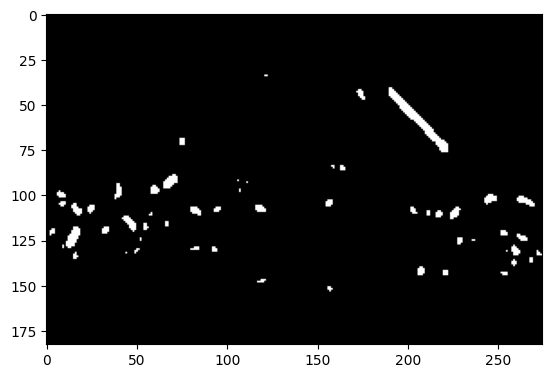

In [21]:
th = L2.mean() + 3 * L2.std()
th2 = L1.mean() + 0.5 * L1.std()
new_cornerHarris = L2 > th
new_edgeHarris = L1 > th2
plt.imshow(new_cornerHarris, cmap='gray')
plt.show()

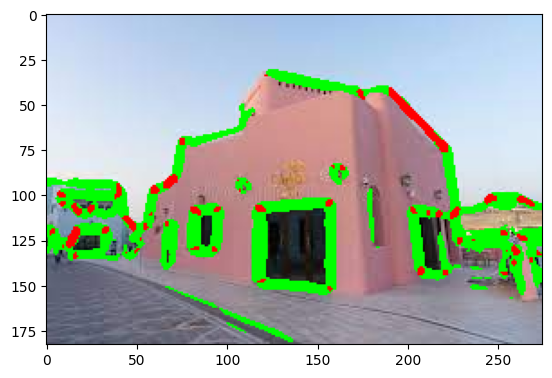

In [22]:
img2 = img_org
idx = np.argwhere(new_cornerHarris)
r, c = idx[:, 0], idx[:, 1]

idx2 = np.argwhere(new_edgeHarris)
r2, c2 = idx2[:, 0], idx2[:, 1]
for i in range(len(r2)):
    img2 = cv.circle(np.float64(img2), (c2[i], r2[i]), 0, (0, 255, 0), -1)
for i in range(len(r)):
    img2 = cv.circle(np.float64(img2), (c[i], r[i]), 0, (0, 0, 255), -1)
plt.imshow(np.array(img2[:, :, ::-1], dtype=np.uint16))
plt.show()

L2 near 0 and L1 high --> edge

L2 near 0 and L1 near 0 --> flat

L2 large -----------------> corner

In [ ]:
# dst = cv.cornerHarris(img, 2, 3, 0.04)